In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.plotly as py
import plotly
import collections
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
tfidf = TfidfVectorizer()

In [2]:
#Open and read first 6000 rows of the CSV
df = pd.read_csv("text_gtd.csv")
dataframe = df.head(6000)


In [3]:
#Storing some daa in lists so vecors can be made easily
original = dataframe['concatColumn'].tolist()
countries= dataframe['mydata.country_txt'].tolist()

In [4]:
#List of english Stop words
stop_words = ["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]
stop_words.append("")

In [5]:
#Replace all extra spaces, digits and convert to lower case 
dataframe['concatColumn'] = dataframe['concatColumn'].str.replace('[^\w\s]','')
dataframe['concatColumn'] = dataframe['concatColumn'].str.replace('[\d]','')
dataframe['concatColumn']  = dataframe['concatColumn'] .apply(lambda x: x.lower())

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [6]:

data_filtered = dataframe['concatColumn'].tolist()

In [7]:
#Removing stop words for the string
data_filtered_final = []
for i in data_filtered:
    string = i.split(' ')
    filtered_string = [w for w in string if not w in stop_words]
    data_filtered_final.append(' '.join(filtered_string))

In [8]:
#Create TFIDF vectors from filtered data
vectors = tfidf.fit_transform(data_filtered_final)

In [9]:
#Method 1 of clustering. Customized Bucketization using Cosine Similarity

In [10]:
#Matrix of cosine similarity values between all the vectors
mat = cosine_similarity(vectors, vectors)

In [11]:
#All values will be put into one cluster if they have a cosine similarity > 0.9 with the first element
#Once they are put in a cluster they will no be considered for clustering again
removed = []
buckets = []
for i in range (0,mat.shape[0]):
    l1 = []
    for j in range (i,mat.shape[0]):
        if mat[i][j] > 0.9 and j not in removed:
            l1.append(countries[j])
            l1.append(original[j])
            removed.append(j)
    buckets.append(l1) 

In [12]:
#Number of clusters got for customized clustering 
clustercount = 0
for i in buckets:
    if len(i) >20:
        clustercount = clustercount + 1
        
print("By customized bucketing there are ",clustercount, "clusters")

('By customized bucketing there are ', 90, 'clusters')


In [13]:
#Picking only clusters which have more than 20 elements
result = []
for i in buckets:
    res = []
    if len(i) > 20 and len(i[1]) < 100:
        res.append(i[2])
        res.append(i[1])
        res.append(len(i))
        result.append(res)


result.sort();
    

In [14]:
def grouping_function(result):
    #Get names of unique countries
    m = set(countries)
    c = []
    for i in m:
        c.append(i) 

    #Get name of country followed by list of all crimes occuring there with their counts
    grouping = []
    for i in c:
        g = []
        g.append(i)
        for j in result:
            grp = []
            if j[0] == i:
                grp.append(j[2])
                grp.append(j[1])
                g.append(grp)
        grouping.append(g)

    grouping.sort()

    #Get only those countries where there were crimes
    finalgroups = []
    for i in grouping:
        if (len(i)>2):
            finalgroups.append(i)

    finalgroups.sort(key = lambda x: len(x))
    return finalgroups

In [15]:
#Call above defined function
finalgroups = grouping_function(result)

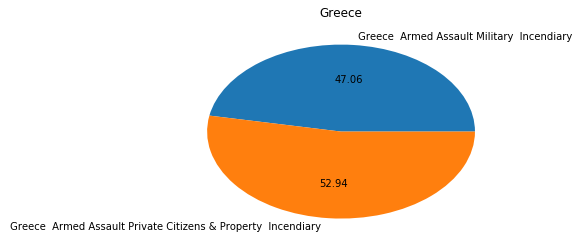

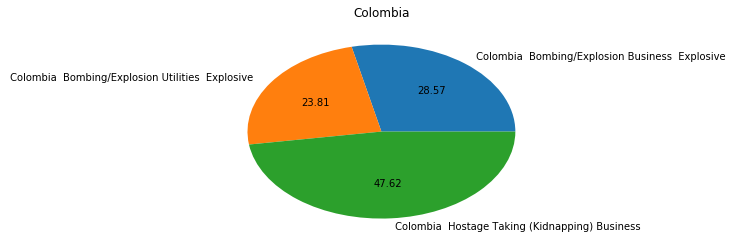

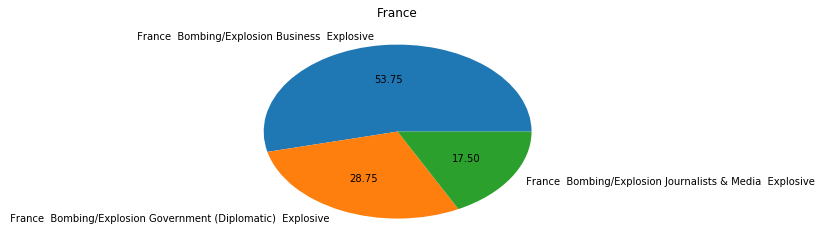

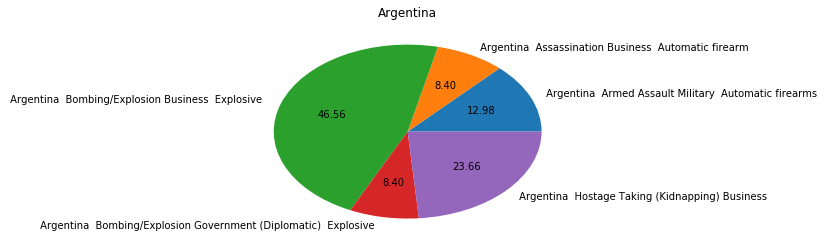

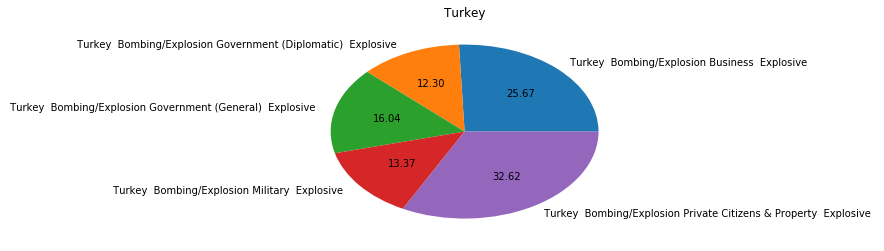

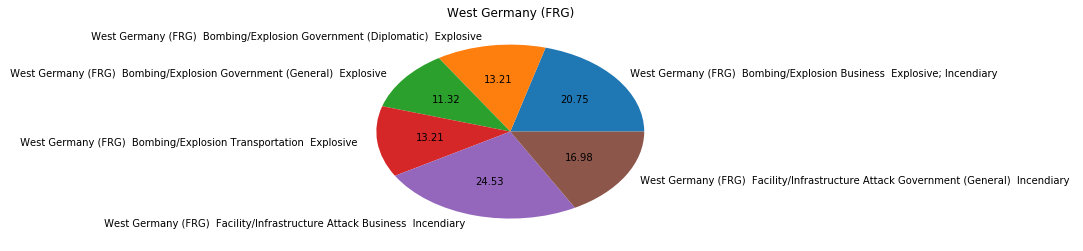

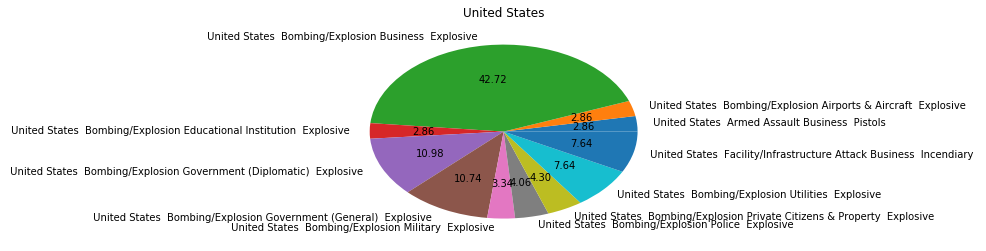

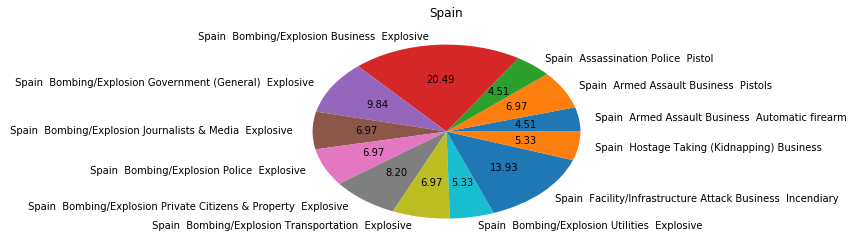

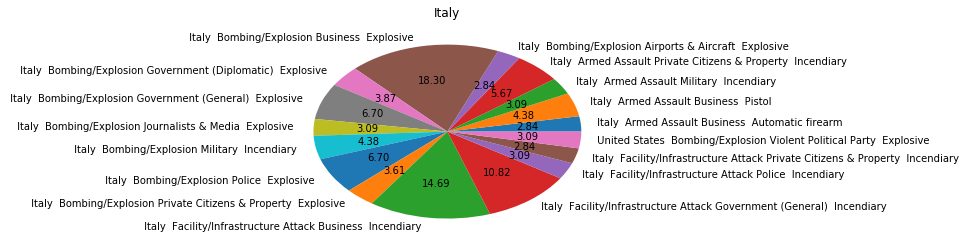

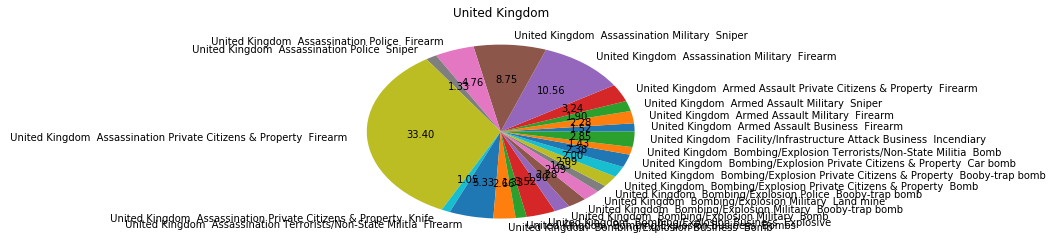

In [16]:
#Plot PIE chart for each country
for j in range(0, len(finalgroups)):
    data_for_pie = []
    labels_for_pie = []
    for i in range(1,len(finalgroups[j])):
        data_for_pie.append(finalgroups[j][i][0])
        labels_for_pie.append(finalgroups[j][i][1])
    plt.pie(data_for_pie, labels = labels_for_pie,autopct='%.2f')
    plt.title(finalgroups[j][0])
    plt.show()

In [17]:
#Getting data to plot on world map
country1 = []
crime1 = []
for i in finalgroups:
    l = []
    for j in range(1,len(i)):
        l.append(i[j][0])
    if (len(i) > 1):
        country1.append(i[0])
        crime1.append(sum(l))

In [19]:
#Plotting on world map
plotly.tools.set_credentials_file(username='roshvenkatesh', api_key='gNVH1NiarZI7blgeVKRU')
data = [ dict(
        type = 'choropleth',
        z = crime1,
        locations = ['GRC','COL','FRA','ARG','TUR','DEU','USA','ESP','ITA','GBR'],
        text = country1,
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of attacks'),
      ) ]

layout = dict(
    title = 'Most Terrorism Affected Countries',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [ ]:
#Clustering Method 2, Density Based Scanning

In [20]:
db = DBSCAN(eps=0.3, min_samples=20).fit(vectors)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(vectors, labels))

import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
m = svd.fit_transform(vectors)

Estimated number of clusters: 41
Silhouette Coefficient: 0.162


In [21]:
counts = list(collections.Counter(labels).items())

In [22]:
#Get buckets country and count for each cluster
group = []
for j in range(0,n_clusters_):
    single = []
    for i in range(0,len(data_filtered_final)):
        if labels[i] == j:
            single.append(countries[i])
            single.append(data_filtered_final[i])
            single.append(counts[j][1])
            break
    group.append(single)

In [23]:
finalgroups2 = grouping_function(group)

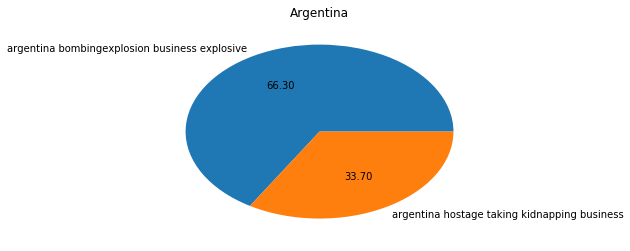

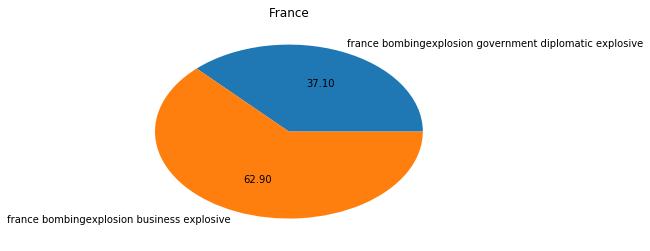

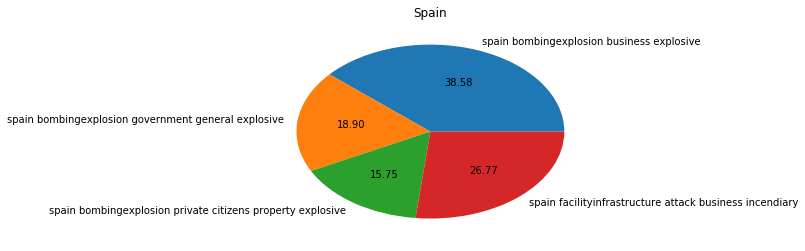

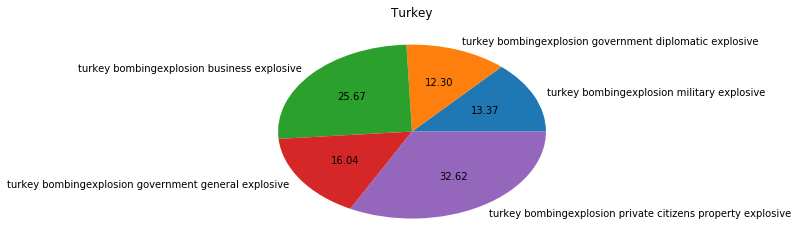

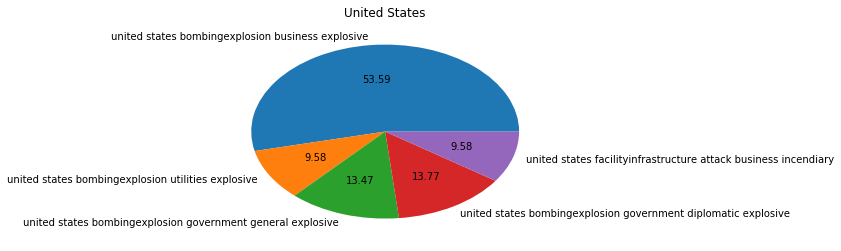

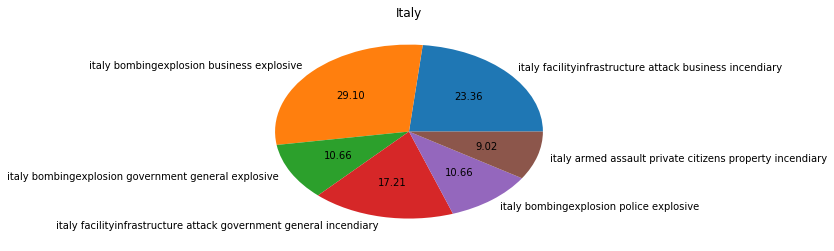

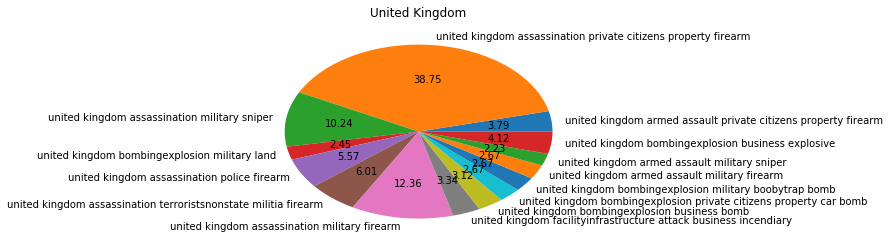

In [24]:
for j in range(0, len(finalgroups2)):
    data_for_pie = []
    labels_for_pie = []
    for i in range(1,len(finalgroups2[j])):
        data_for_pie.append(finalgroups2[j][i][0])
        labels_for_pie.append(finalgroups2[j][i][1])
    plt.pie(data_for_pie, labels = labels_for_pie,autopct='%.2f')
    plt.title(finalgroups2[j][0])
    plt.show()